In [1]:
import numpy as np
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt

In [2]:
from numpy.random import seed
seed(1)

In [10]:

img_rows, img_cols = 28, 28


letter_file = "C:\\Users\\Meyah\\Desktop\\AI\\emnist-letters-train.csv"
test_file = "C:\\Users\\Meyah\\Desktop\\AI\\emnist-letters-test.csv"
num_classes = 37
classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'


In [5]:

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:, 1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [6]:
## Convert One-Hot-Encoded values back to real values
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [7]:
## Plot an image with it's correct value
def show_img(img,label):
    img_flip = np.transpose(img, axes=[1,0])
    plt.title('Label: ' + str(classes[decode_label(label)]))
    plt.imshow(img_flip, cmap='Greys_r')

In [11]:
## Evaluate model with the test dataset
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x, test_y)
    print("The accuracy of the model is: ",result[1])
    return result


In [22]:
## Plot the training history
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'ro', label='Validation loss')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [13]:
letter_data = np.loadtxt(letter_file, skiprows=1, delimiter=',')
x, y = prep_data(letter_data)

In [14]:
print(x.shape)
print(y.shape)

(88799, 28, 28, 1)
(88799, 37)


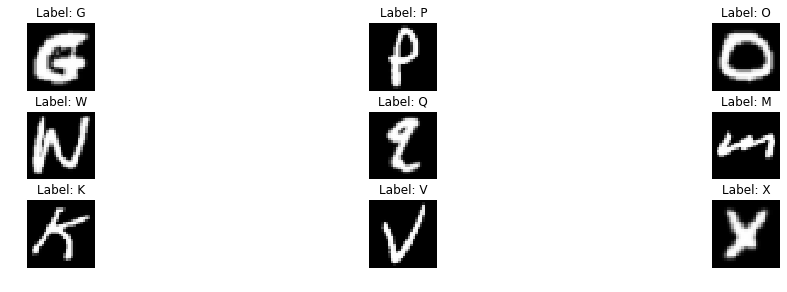

In [20]:
fig = plt.figure(figsize=(17,4.5))
for idx in range(9):
    fig.add_subplot(3,3,idx+1)
    plt.axis('off')
    show_img(np.squeeze(x[idx]),y[idx])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [16]:
test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
test_x, test_y = prep_data(test_data)

In [17]:
print(test_x.shape)
print(test_y.shape)

(14799, 28, 28, 1)
(14799, 37)


In [18]:

def create_basic_model():
    batch_size = 64

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [19]:
batch_size = 128

basic_model = create_basic_model()
basic_history = basic_model.fit(x, y,
          batch_size = batch_size,
          epochs = 10,
          validation_split = 0.2)

Train on 71039 samples, validate on 17760 samples
Epoch 1/10
71039/71039 [==============================] - 147s 2ms/sample - loss: 0.6184 - accuracy: 0.8099 - val_loss: 0.3566 - val_accuracy: 0.8887
Epoch 2/10
71039/71039 [==============================] - 145s 2ms/sample - loss: 0.2795 - accuracy: 0.9082 - val_loss: 0.3094 - val_accuracy: 0.9022
Epoch 3/10
71039/71039 [==============================] - 152s 2ms/sample - loss: 0.2092 - accuracy: 0.9284 - val_loss: 0.2749 - val_accuracy: 0.9153
Epoch 4/10
71039/71039 [==============================] - 144s 2ms/sample - loss: 0.1624 - accuracy: 0.9423 - val_loss: 0.2823 - val_accuracy: 0.9141
Epoch 5/10
71039/71039 [==============================] - 143s 2ms/sample - loss: 0.1271 - accuracy: 0.9520 - val_loss: 0.3003 - val_accuracy: 0.9144
Epoch 6/10
71039/71039 [==============================] - 154s 2ms/sample - loss: 0.1030 - accuracy: 0.9612 - val_loss: 0.3218 - val_accuracy: 0.9126
Epoch 7/10
71039/71039 [==========================